In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('output-mck.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,contract_id,customer_id,customer_parent_company_id,shipping_date,market,contract_type,material_id,incoterms,country,region_id,...,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,price_per_unit,revenue
0,0,0,-1,24.11.2018,domestic,spot,430604,CPT,RU,50,...,Пр-во строительных материалов,0.0,0,0,1.357807e+07,0,292536.374275,63.334508,327471.105055,2.074022e+07
1,1,1,-1,01.11.2018,domestic,spot,430604,FCA,RU,74,...,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,320815.168845,2.031867e+07
2,1,1,-1,07.11.2018,domestic,spot,430604,FCA,RU,74,...,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,320815.168845,2.031867e+07
3,2,2,-1,24.11.2018,domestic,spot,430604,CPT,RU,32,...,Пр-во строительных материалов,0.0,0,0,1.038323e+07,0,292536.374275,31.667254,330932.166203,1.047971e+07
4,2,2,-1,29.11.2018,domestic,spot,430604,CPT,RU,32,...,Пр-во строительных материалов,0.0,0,0,1.863657e+07,0,292536.374275,63.334508,330932.166203,2.095943e+07


In [4]:
y_revenue = data['revenue']
price = data['price_per_unit']
all_costs = data['cost_ifso'] + data['cost_dir'] + data['cost_overhead'] + data['cost_commercial'] + data['custom_duties']
contract_id = data['contract_id']
customer_id = data['customer_id']
units = data['units']
data.drop(columns=['revenue', 'contract_id', 'price_per_unit'], inplace=True)
data.head()


,customer_id,customer_parent_company_id,shipping_date,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units
0,0,-1,24.11.2018,domestic,spot,430604,CPT,RU,50,processor,Строительство,Пр-во строительных материалов,0.0,0,0,1.357807e+07,0,292536.374275,63.334508
1,1,-1,01.11.2018,domestic,spot,430604,FCA,RU,74,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508
2,1,-1,07.11.2018,domestic,spot,430604,FCA,RU,74,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508
3,2,-1,24.11.2018,domestic,spot,430604,CPT,RU,32,processor,Строительство,Пр-во строительных материалов,0.0,0,0,1.038323e+07,0,292536.374275,31.667254
4,2,-1,29.11.2018,domestic,spot,430604,CPT,RU,32,processor,Строительство,Пр-во строительных материалов,0.0,0,0,1.863657e+07,0,292536.374275,63.334508


In [5]:
data['shipping_date'] = pd.to_datetime(data['shipping_date'], dayfirst=True)
data['day_of_week'] = data['shipping_date'].dt.dayofweek
data['month'] = data['shipping_date'].dt.month
data.drop(columns=['shipping_date'], inplace=True)
data.head()

,customer_id,customer_parent_company_id,market,contract_type,material_id,incoterms,country,region_id,CRM_client_type,CRM_client_segment,CRM_client_industry,cost_ifso,cost_dir,cost_overhead,cost_commercial,custom_duties,parity_value,units,day_of_week,month
0,0,-1,domestic,spot,430604,CPT,RU,50,processor,Строительство,Пр-во строительных материалов,0.0,0,0,1.357807e+07,0,292536.374275,63.334508,5,11
1,1,-1,domestic,spot,430604,FCA,RU,74,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,3,11
2,1,-1,domestic,spot,430604,FCA,RU,74,processor,Строительство,Пр-во строительных материалов,0.0,0,0,0.000000e+00,0,295455.605000,63.334508,2,11
3,2,-1,domestic,spot,430604,CPT,RU,32,processor,Строительство,Пр-во строительных материалов,0.0,0,0,1.038323e+07,0,292536.374275,31.667254,5,11
4,2,-1,domestic,spot,430604,CPT,RU,32,processor,Строительство,Пр-во строительных материалов,0.0,0,0,1.863657e+07,0,292536.374275,63.334508,3,11


In [78]:
good_features = ['customer_id', 'market', 'country', 'parity_value', 'incoterms', 
                'cost_commercial', 'CRM_client_type', 'units', 'CRM_client_industry']

In [79]:
df = data[good_features]

In [80]:
df.head()

,customer_id,market,country,parity_value,incoterms,cost_commercial,CRM_client_type,units,CRM_client_industry
0,0,domestic,RU,292536.374275,CPT,1.357807e+07,processor,63.334508,Пр-во строительных материалов
1,1,domestic,RU,295455.605000,FCA,0.000000e+00,processor,63.334508,Пр-во строительных материалов
2,1,domestic,RU,295455.605000,FCA,0.000000e+00,processor,63.334508,Пр-во строительных материалов
3,2,domestic,RU,292536.374275,CPT,1.038323e+07,processor,31.667254,Пр-во строительных материалов
4,2,domestic,RU,292536.374275,CPT,1.863657e+07,processor,63.334508,Пр-во строительных материалов


In [81]:
cat_features = ['customer_id', 'market', 'country', 'incoterms', 'CRM_client_type', 'CRM_client_industry']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
train, test, y_train, y_test = train_test_split(df, price)

In [84]:
from catboost import CatBoostRegressor

In [87]:
model = CatBoostRegressor(loss_function='RMSE', cat_features=cat_features, 
                         iterations=1000, max_depth=6, boosting_type='Ordered', 
                         learning_rate=0.1, use_best_model=True)

In [88]:
 model.fit(train, y_train, eval_set=(test, y_test))

0:	learn: 18393.5986691	test: 19138.0257240	best: 19138.0257240 (0)	total: 11.7ms	remaining: 11.7s
1:	learn: 18203.6949656	test: 18910.9756875	best: 18910.9756875 (1)	total: 64.7ms	remaining: 32.3s
2:	learn: 17987.2846049	test: 18707.2839227	best: 18707.2839227 (2)	total: 95.4ms	remaining: 31.7s
3:	learn: 17987.2845365	test: 18707.3065848	best: 18707.2839227 (2)	total: 106ms	remaining: 26.4s
4:	learn: 17885.5459589	test: 18614.8798311	best: 18614.8798311 (4)	total: 135ms	remaining: 26.9s
5:	learn: 17806.8088781	test: 18522.9628408	best: 18522.9628408 (5)	total: 162ms	remaining: 26.9s
6:	learn: 17668.3639068	test: 18391.8231518	best: 18391.8231518 (6)	total: 197ms	remaining: 27.9s
7:	learn: 17616.0413072	test: 18346.1316273	best: 18346.1316273 (7)	total: 226ms	remaining: 28s
8:	learn: 17605.0778374	test: 18330.3855583	best: 18330.3855583 (8)	total: 254ms	remaining: 27.9s
9:	learn: 17348.4723181	test: 18026.7537224	best: 18026.7537224 (9)	total: 293ms	remaining: 29s
10:	learn: 17222.8884

84:	learn: 13473.8858885	test: 13994.1993694	best: 13994.1993694 (84)	total: 3.33s	remaining: 35.9s
85:	learn: 13466.5360345	test: 13990.7211398	best: 13990.7211398 (85)	total: 3.38s	remaining: 35.9s
86:	learn: 13452.3604805	test: 13987.4530423	best: 13987.4530423 (86)	total: 3.41s	remaining: 35.8s
87:	learn: 13446.5707791	test: 13984.0190866	best: 13984.0190866 (87)	total: 3.45s	remaining: 35.7s
88:	learn: 13441.1823874	test: 13982.9181022	best: 13982.9181022 (88)	total: 3.48s	remaining: 35.6s
89:	learn: 13435.6310614	test: 13981.5792563	best: 13981.5792563 (89)	total: 3.51s	remaining: 35.5s
90:	learn: 13420.0390707	test: 13970.8008954	best: 13970.8008954 (90)	total: 3.56s	remaining: 35.6s
91:	learn: 13417.4788220	test: 13971.3114509	best: 13970.8008954 (90)	total: 3.59s	remaining: 35.5s
92:	learn: 13415.2366326	test: 13971.2756277	best: 13970.8008954 (90)	total: 3.62s	remaining: 35.3s
93:	learn: 13410.4568635	test: 13970.1018575	best: 13970.1018575 (93)	total: 3.65s	remaining: 35.2s


166:	learn: 13077.9039630	test: 13788.2263808	best: 13788.2263808 (166)	total: 6.54s	remaining: 32.6s
167:	learn: 13076.9720712	test: 13788.1539032	best: 13788.1539032 (167)	total: 6.58s	remaining: 32.6s
168:	learn: 13076.3730971	test: 13788.1302090	best: 13788.1302090 (168)	total: 6.61s	remaining: 32.5s
169:	learn: 13072.1368009	test: 13785.1100910	best: 13785.1100910 (169)	total: 6.65s	remaining: 32.5s
170:	learn: 13071.8468400	test: 13785.0936639	best: 13785.0936639 (170)	total: 6.67s	remaining: 32.4s
171:	learn: 13059.1947274	test: 13777.0397200	best: 13777.0397200 (171)	total: 6.71s	remaining: 32.3s
172:	learn: 13056.6964208	test: 13771.6395728	best: 13771.6395728 (172)	total: 6.75s	remaining: 32.3s
173:	learn: 13054.9241714	test: 13769.9912210	best: 13769.9912210 (173)	total: 6.81s	remaining: 32.3s
174:	learn: 13047.7020745	test: 13768.2464035	best: 13768.2464035 (174)	total: 6.86s	remaining: 32.4s
175:	learn: 13043.7666872	test: 13763.2824096	best: 13763.2824096 (175)	total: 6.9

248:	learn: 12939.0228463	test: 13675.3940188	best: 13675.3501984 (243)	total: 9.2s	remaining: 27.7s
249:	learn: 12939.0228326	test: 13675.3959865	best: 13675.3501984 (243)	total: 9.22s	remaining: 27.7s
250:	learn: 12939.0228209	test: 13675.3977577	best: 13675.3501984 (243)	total: 9.24s	remaining: 27.6s
251:	learn: 12939.0228108	test: 13675.3993520	best: 13675.3501984 (243)	total: 9.26s	remaining: 27.5s
252:	learn: 12939.0199718	test: 13675.4003485	best: 13675.3501984 (243)	total: 9.29s	remaining: 27.4s
253:	learn: 12939.0121674	test: 13675.4078151	best: 13675.3501984 (243)	total: 9.31s	remaining: 27.4s
254:	learn: 12939.0120677	test: 13675.4096468	best: 13675.3501984 (243)	total: 9.34s	remaining: 27.3s
255:	learn: 12939.0051397	test: 13675.4161871	best: 13675.3501984 (243)	total: 9.37s	remaining: 27.2s
256:	learn: 12938.9989616	test: 13675.4220753	best: 13675.3501984 (243)	total: 9.41s	remaining: 27.2s
257:	learn: 12938.9988761	test: 13675.4228529	best: 13675.3501984 (243)	total: 9.43

331:	learn: 12938.9282990	test: 13675.4606366	best: 13675.3501984 (243)	total: 11.6s	remaining: 23.3s
332:	learn: 12938.9281396	test: 13675.4604421	best: 13675.3501984 (243)	total: 11.6s	remaining: 23.2s
333:	learn: 12938.9281144	test: 13675.4608550	best: 13675.3501984 (243)	total: 11.6s	remaining: 23.2s
334:	learn: 12938.9278262	test: 13675.4616907	best: 13675.3501984 (243)	total: 11.6s	remaining: 23.1s
335:	learn: 12938.9276833	test: 13675.4614695	best: 13675.3501984 (243)	total: 11.7s	remaining: 23.1s
336:	learn: 12938.9274290	test: 13675.4622457	best: 13675.3501984 (243)	total: 11.7s	remaining: 23s
337:	learn: 12938.9272998	test: 13675.4620420	best: 13675.3501984 (243)	total: 11.7s	remaining: 22.9s
338:	learn: 12938.9272998	test: 13675.4621495	best: 13675.3501984 (243)	total: 11.7s	remaining: 22.9s
339:	learn: 12938.9272998	test: 13675.4622462	best: 13675.3501984 (243)	total: 11.7s	remaining: 22.8s
340:	learn: 12938.9271770	test: 13675.4620424	best: 13675.3501984 (243)	total: 11.8s

415:	learn: 12938.9113357	test: 13675.4589953	best: 13675.3501984 (243)	total: 13.6s	remaining: 19.1s
416:	learn: 12938.9113263	test: 13675.4589541	best: 13675.3501984 (243)	total: 13.6s	remaining: 19s
417:	learn: 12938.9113180	test: 13675.4588695	best: 13675.3501984 (243)	total: 13.6s	remaining: 19s
418:	learn: 12938.9113095	test: 13675.4588409	best: 13675.3501984 (243)	total: 13.6s	remaining: 18.9s
419:	learn: 12938.9113013	test: 13675.4588151	best: 13675.3501984 (243)	total: 13.7s	remaining: 18.9s
420:	learn: 12938.9112936	test: 13675.4587919	best: 13675.3501984 (243)	total: 13.7s	remaining: 18.8s
421:	learn: 12938.9112862	test: 13675.4587711	best: 13675.3501984 (243)	total: 13.7s	remaining: 18.8s
422:	learn: 12938.9112792	test: 13675.4587552	best: 13675.3501984 (243)	total: 13.7s	remaining: 18.7s
423:	learn: 12938.9112725	test: 13675.4587382	best: 13675.3501984 (243)	total: 13.7s	remaining: 18.7s
424:	learn: 12938.9112662	test: 13675.4587256	best: 13675.3501984 (243)	total: 13.8s	r

496:	learn: 12937.2601817	test: 13672.7097588	best: 13672.7030769 (495)	total: 15.3s	remaining: 15.5s
497:	learn: 12937.2587020	test: 13672.7157921	best: 13672.7030769 (495)	total: 15.4s	remaining: 15.5s
498:	learn: 12937.0631532	test: 13672.7684022	best: 13672.7030769 (495)	total: 15.4s	remaining: 15.5s
499:	learn: 12936.8759034	test: 13672.8212010	best: 13672.7030769 (495)	total: 15.4s	remaining: 15.4s
500:	learn: 12936.8738453	test: 13672.8300189	best: 13672.7030769 (495)	total: 15.4s	remaining: 15.4s
501:	learn: 12936.8738363	test: 13672.8339695	best: 13672.7030769 (495)	total: 15.5s	remaining: 15.3s
502:	learn: 12936.8738289	test: 13672.8375259	best: 13672.7030769 (495)	total: 15.5s	remaining: 15.3s
503:	learn: 12936.8720636	test: 13672.8446986	best: 13672.7030769 (495)	total: 15.5s	remaining: 15.3s
504:	learn: 12936.6184350	test: 13672.9102934	best: 13672.7030769 (495)	total: 15.5s	remaining: 15.2s
505:	learn: 12936.6184262	test: 13672.9132324	best: 13672.7030769 (495)	total: 15.

577:	learn: 12690.9582612	test: 13506.4083756	best: 13506.4083756 (577)	total: 18.6s	remaining: 13.6s
578:	learn: 12690.2558950	test: 13506.3990409	best: 13506.3990409 (578)	total: 18.6s	remaining: 13.5s
579:	learn: 12681.4526994	test: 13496.9938562	best: 13496.9938562 (579)	total: 18.7s	remaining: 13.5s
580:	learn: 12679.5069720	test: 13497.3909437	best: 13496.9938562 (579)	total: 18.7s	remaining: 13.5s
581:	learn: 12675.8253807	test: 13494.0741346	best: 13494.0741346 (581)	total: 18.8s	remaining: 13.5s
582:	learn: 12675.2518829	test: 13494.8690758	best: 13494.0741346 (581)	total: 18.8s	remaining: 13.5s
583:	learn: 12670.4411909	test: 13491.8915534	best: 13491.8915534 (583)	total: 18.9s	remaining: 13.5s
584:	learn: 12664.3416380	test: 13489.8178006	best: 13489.8178006 (584)	total: 19s	remaining: 13.4s
585:	learn: 12662.7054995	test: 13489.5527893	best: 13489.5527893 (585)	total: 19s	remaining: 13.4s
586:	learn: 12661.8560042	test: 13487.9232052	best: 13487.9232052 (586)	total: 19.1s	r

658:	learn: 11990.2459973	test: 12967.6026462	best: 12967.6026462 (658)	total: 22.2s	remaining: 11.5s
659:	learn: 11963.3661557	test: 12951.8384499	best: 12951.8384499 (659)	total: 22.2s	remaining: 11.5s
660:	learn: 11961.7860918	test: 12950.3738637	best: 12950.3738637 (660)	total: 22.3s	remaining: 11.4s
661:	learn: 11950.1876052	test: 12936.2014952	best: 12936.2014952 (661)	total: 22.3s	remaining: 11.4s
662:	learn: 11946.6823990	test: 12937.3354061	best: 12936.2014952 (661)	total: 22.4s	remaining: 11.4s
663:	learn: 11909.3154478	test: 12918.1537360	best: 12918.1537360 (663)	total: 22.4s	remaining: 11.3s
664:	learn: 11903.3015558	test: 12914.7106068	best: 12914.7106068 (664)	total: 22.5s	remaining: 11.3s
665:	learn: 11893.9387551	test: 12903.8546299	best: 12903.8546299 (665)	total: 22.5s	remaining: 11.3s
666:	learn: 11891.0078388	test: 12903.3528968	best: 12903.3528968 (666)	total: 22.5s	remaining: 11.2s
667:	learn: 11881.8527607	test: 12892.3477780	best: 12892.3477780 (667)	total: 22.

739:	learn: 11001.5066224	test: 12073.4943914	best: 12073.4943914 (739)	total: 25.9s	remaining: 9.1s
740:	learn: 10986.3186057	test: 12069.4251504	best: 12069.4251504 (740)	total: 25.9s	remaining: 9.07s
741:	learn: 10972.7319340	test: 12046.6648935	best: 12046.6648935 (741)	total: 26s	remaining: 9.04s
742:	learn: 10964.5314602	test: 12038.5843047	best: 12038.5843047 (742)	total: 26s	remaining: 9.01s
743:	learn: 10959.8946740	test: 12036.4605299	best: 12036.4605299 (743)	total: 26.1s	remaining: 8.98s
744:	learn: 10951.8468601	test: 12033.3311938	best: 12033.3311938 (744)	total: 26.1s	remaining: 8.95s
745:	learn: 10946.0868527	test: 12028.5379958	best: 12028.5379958 (745)	total: 26.2s	remaining: 8.92s
746:	learn: 10938.0011240	test: 12020.2500873	best: 12020.2500873 (746)	total: 26.2s	remaining: 8.88s
747:	learn: 10919.1813962	test: 11995.2419628	best: 11995.2419628 (747)	total: 26.3s	remaining: 8.85s
748:	learn: 10900.1063182	test: 11985.2037179	best: 11985.2037179 (748)	total: 26.3s	re

820:	learn: 10210.5591702	test: 11325.1275585	best: 11325.1275585 (820)	total: 29.2s	remaining: 6.38s
821:	learn: 10207.6314587	test: 11318.9335351	best: 11318.9335351 (821)	total: 29.3s	remaining: 6.34s
822:	learn: 10205.0899332	test: 11313.6743226	best: 11313.6743226 (822)	total: 29.3s	remaining: 6.3s
823:	learn: 10172.6529945	test: 11273.4058319	best: 11273.4058319 (823)	total: 29.4s	remaining: 6.27s
824:	learn: 10169.1882198	test: 11270.1306106	best: 11270.1306106 (824)	total: 29.4s	remaining: 6.23s
825:	learn: 10141.6363281	test: 11238.6078623	best: 11238.6078623 (825)	total: 29.4s	remaining: 6.2s
826:	learn: 10139.8443425	test: 11238.4540396	best: 11238.4540396 (826)	total: 29.5s	remaining: 6.16s
827:	learn: 10133.9320604	test: 11231.8045507	best: 11231.8045507 (827)	total: 29.5s	remaining: 6.13s
828:	learn: 10110.4890373	test: 11211.4403329	best: 11211.4403329 (828)	total: 29.5s	remaining: 6.09s
829:	learn: 10107.6217757	test: 11206.3391244	best: 11206.3391244 (829)	total: 29.6s

906:	learn: 9668.1984082	test: 10758.8500131	best: 10758.8500131 (906)	total: 32.8s	remaining: 3.36s
907:	learn: 9662.4916943	test: 10753.7850548	best: 10753.7850548 (907)	total: 32.8s	remaining: 3.32s
908:	learn: 9660.2794213	test: 10752.4267357	best: 10752.4267357 (908)	total: 32.9s	remaining: 3.29s
909:	learn: 9658.0485555	test: 10746.4122259	best: 10746.4122259 (909)	total: 32.9s	remaining: 3.25s
910:	learn: 9655.4302314	test: 10743.1319826	best: 10743.1319826 (910)	total: 32.9s	remaining: 3.22s
911:	learn: 9650.6950648	test: 10738.4874730	best: 10738.4874730 (911)	total: 33s	remaining: 3.18s
912:	learn: 9646.5459207	test: 10736.9457015	best: 10736.9457015 (912)	total: 33s	remaining: 3.15s
913:	learn: 9645.5445217	test: 10736.7659473	best: 10736.7659473 (913)	total: 33.1s	remaining: 3.11s
914:	learn: 9641.8816159	test: 10732.8026576	best: 10732.8026576 (914)	total: 33.1s	remaining: 3.07s
915:	learn: 9639.6422124	test: 10729.9396348	best: 10729.9396348 (915)	total: 33.1s	remaining: 

988:	learn: 9176.0203136	test: 10282.0023016	best: 10282.0023016 (988)	total: 36.4s	remaining: 405ms
989:	learn: 9173.9059365	test: 10279.5190643	best: 10279.5190643 (989)	total: 36.5s	remaining: 368ms
990:	learn: 9170.2289045	test: 10266.9206336	best: 10266.9206336 (990)	total: 36.5s	remaining: 331ms
991:	learn: 9169.6433450	test: 10266.4876650	best: 10266.4876650 (991)	total: 36.5s	remaining: 295ms
992:	learn: 9167.8167751	test: 10266.1780324	best: 10266.1780324 (992)	total: 36.6s	remaining: 258ms
993:	learn: 9166.4355406	test: 10265.7670100	best: 10265.7670100 (993)	total: 36.6s	remaining: 221ms
994:	learn: 9166.0231345	test: 10266.0185956	best: 10265.7670100 (993)	total: 36.7s	remaining: 184ms
995:	learn: 9159.5415147	test: 10260.0885653	best: 10260.0885653 (995)	total: 36.7s	remaining: 147ms
996:	learn: 9158.6241831	test: 10258.7123081	best: 10258.7123081 (996)	total: 36.8s	remaining: 111ms
997:	learn: 9157.3718482	test: 10258.1488905	best: 10258.1488905 (997)	total: 36.8s	remaini

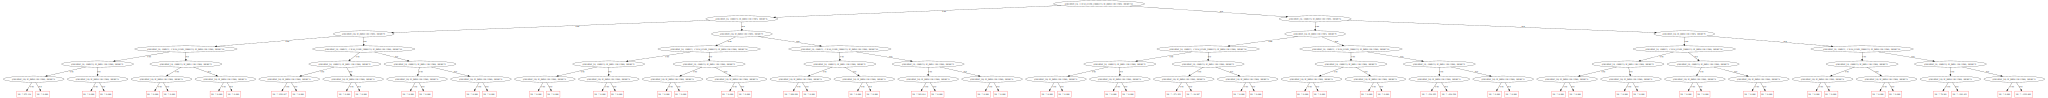

In [90]:
model.plot_tree(1, pool=df)

In [46]:
model.feature_importances_

array([6.72175291e+00, 6.41417130e+01, 3.72457729e-01, 8.01985542e+00,
       1.59526924e+01, 6.96679554e-02, 2.18467612e+00, 8.65160785e-03,
       9.05226707e-01, 1.62330616e+00])

In [47]:
model.feature_names_

['customer_id',
 'cost_ifso',
 'market',
 'country',
 'parity_value',
 'incoterms',
 'cost_commercial',
 'CRM_client_type',
 'units',
 'CRM_client_industry']

In [65]:
df['CRM_client_industry'].unique()

array(['Пр-во строительных материалов', 'Торговля',
       'Товары народного потребления', 'Пр-во упаковочных материалов'],
      dtype=object)

In [69]:
model.predict(test)

array([335225.54273515, 283865.31217396, 329347.83016318, ...,
       357935.02652953, 334864.31961072, 298927.72448181])

In [70]:
test

,customer_id,cost_ifso,market,country,parity_value,incoterms,cost_commercial,CRM_client_type,units,CRM_client_industry
165,18,0.000000e+00,domestic,RU,281148.446481,CPT,2.795485e+07,processor,63.334508,Пр-во строительных материалов
1072,3,2.786445e+07,domestic,RU,296226.991660,FCA,0.000000e+00,trader,10.555751,Торговля
4076,92,0.000000e+00,export,BY,350364.235736,CPT,6.269548e+06,processor,44.861943,Пр-во строительных материалов
4127,19,0.000000e+00,domestic,RU,329599.722012,FCA,0.000000e+00,processor,21.111503,Пр-во строительных материалов
3463,68,3.063219e+07,domestic,RU,345591.276849,CPT,7.987103e+06,processor,47.500881,Пр-во строительных материалов
3710,3,0.000000e+00,domestic,RU,351601.771914,FCA,0.000000e+00,trader,63.334508,Торговля
1440,76,3.000221e+07,export,KZ,293712.775060,FCA,0.000000e+00,trader,63.334508,Торговля
2920,49,3.061722e+07,domestic,RU,324115.946372,FCA,0.000000e+00,processor,21.111503,Пр-во строительных материалов
3460,48,3.083976e+07,domestic,RU,347129.871851,CPT,4.526023e+06,processor,31.667254,Товары народного потребления
2143,60,2.942043e+07,domestic,RU,319161.749005,FCA,0.000000e+00,processor,63.334508,Пр-во строительных материалов


In [73]:
with open('tree_new.svg', 'w') as f:
    f.write(pic._repr_svg_())

In [ ]:
df[df['shipping_date'].dt.month == 11 | df['shipping_date'].dt.month == 12]